# A. Basics of Linear Algebra to Solve Systems of Equations

**Goals**
- Understand how to represent a linear system in matrix form $A\mathbf{x}=\mathbf{b}$.
- Diagnose when a system has a unique solution, infinitely many solutions, or no solution.
- Use NumPy to compute ranks, determinants, and solve or analyze systems.
- See geometric intuition in 2D (lines) and learn core algorithms (Gaussian elimination).

In [30]:
# Add this to your cells to import commonly used libraries
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

### 1. Linear systems and matrix form
A linear system with unknown vector $\mathbf{x} \in \mathbb{R}^n$ can be written as $A\mathbf{x} = \mathbf{b},$ where $A \in \mathbb{R}^{m\times n}$ is the coefficient matrix and $\mathbf{b} \in \mathbb{R}^m$.

**Augmented matrix**: $[A\mid \mathbf{b}]$ is useful for row-reduction (Gaussian elimination).

In this example below, we have two equations: 
x + y + z = 3 & 2x -y -3z = 0

In [2]:
# Add comments yourself!!!
# A small example system
import numpy as np
A = np.array([[1., 1., 1.], [2., -1., -3]])
b = np.array([3., 0.])#[:, None]
print('A =\n', A)
print('b =\n', b)
aug = np.c_[A, b]  # Syntax to create augmented matrix [A|b]
print('Augmented [A|b] =\n', aug)

A =
 [[ 1.  1.  1.]
 [ 2. -1. -3.]]
b =
 [3. 0.]
Augmented [A|b] =
 [[ 1.  1.  1.  3.]
 [ 2. -1. -3.  0.]]


### 2. Types of solutions and rank conditions
Let $r = \operatorname{rank}(A)$ and $r_a = \operatorname{rank}([A\mid \mathbf{b}])$.
- **Unique solution**: $r = r_a = n$.
- **Infinitely many solutions**: $r = r_a < n$.
- **No solution** (inconsistent): $r \neq r_a$.

For a square system ($m=n$): $\det(A) \neq 0$ $\Rightarrow$ unique solution; if $\det(A)=0$, then either infinitely many or none (check consistency).

#### 2.1 Unique solution example
We have two equations in the example below: x + y = 3 & 2x - y = 0. That's why we have a unique solution.

In [45]:
A1 = np.array([[1., 1.], [2., -1.]])
b1 = np.array([3., 0.])
rA1 = matrix_rank(A1)
rAug1 = matrix_rank(np.c_[A1, b1])
x = np.linalg.solve(A1, b1)
print("Solution:\n", x)
print('rank(A)=', rA1, ' rank([A|b])=', rAug1)
print('det(A)=', det(A1))

Solution:
 [1. 2.]
rank(A)= 2  rank([A|b])= 2
det(A)= -2.9999999999999996


Exercise- 
Plot these two functions in the same plot

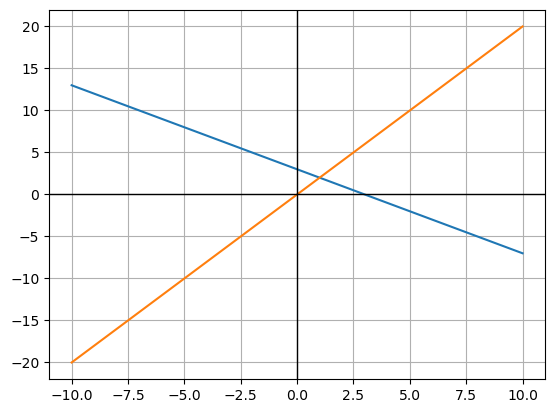

In [48]:
# Your code here
# x+y=3, 2x-y=0
x = np.linspace(-10,10,10)
y1 = 3 - x
y2 = 2 * x

plt.plot(x,y1)
plt.plot(x,y2)
plt.axhline(0, color='black', linewidth=1); plt.axvline(0, color='black', linewidth=1)
plt.grid()
plt.show()

#### 2.2 Infinitely many solutions example
In this example, the second equation is a multiple of the first.

In [50]:
A2 = np.array([[1., 1.], [2., 2.]])
b2 = np.array([2., 4.])
rA2 = matrix_rank(A2)
rAug2 = matrix_rank(np.c_[A2, b2])
print('rank(A)=', rA2, ' rank([A|b])=', rAug2)
print('det(A)=', det(A2))

rank(A)= 1  rank([A|b])= 1
det(A)= 0.0


Exercise- 

Plot there two functions together in one plot: x + y = 2 & 2x + 2y = 4

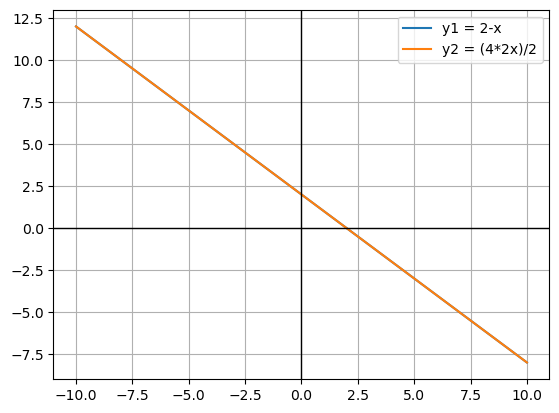

In [ ]:
# Your code here
x = np.linspace(-10,10,20)
y1 = 2 - x
y2 = (4 - (2 * x)) / 2 # y = 4-2x/2

plt.plot(x,y1, label='y1 = 2-x')
plt.plot(x,y2, label='y2 = (4-2x)/2')
plt.axhline(0, color='black', linewidth=1); plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid()
plt.show()

#### 2.3 No solution example
Parallel lines (inconsistent).

In [43]:
A3 = np.array([[1., 1.], [2., 2.]])
b3 = np.array([2., 5.])
rA3 = matrix_rank(A3)
rAug3 = matrix_rank(np.c_[A3, b3])
print('rank(A)=', rA3, ' rank([A|b])=', rAug3, ' => inconsistent')
print('det(A)=', det(A3))


rank(A)= 1  rank([A|b])= 2  => inconsistent
det(A)= 0.0


Exercise-

Plot these two functions toghether in one plot: x + y = 2 & 2x + 2y = 5

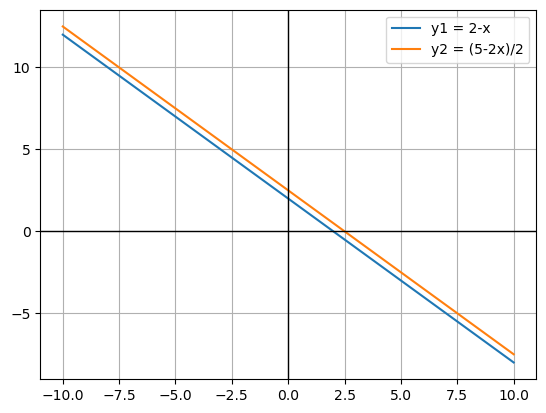

In [52]:
# Your code here
x = np.linspace(-10, 10, 20)
y1 = 2 - x
y2 = (5 - 2 * x) / 2

plt.plot(x, y1, label='y1 = 2-x')
plt.plot(x, y2, label='y2 = (5-2x)/2')
plt.axhline(0, color='black', linewidth=1); plt.axvline(0, color='black', linewidth=1)
plt.legend()
plt.grid()
plt.show()

# B. Solving Systems of Linear Equations with Python
We will explore various methods for solving systems of linear equations using Python. We will cover

1. Solving systems using `numpy.linalg.solve` and matrix inversion
2. Gauss Elimination
3. Iterative methods like Gauss-Seidel
4. Least squares method

## 1. Types of Solutions to Linear Systems
- Unique solution
- Infinite solutions
- No solution
- Geometric interpretation
- Role of rank and determinant

### Geometric interpretation in 2D
- Unique solution: two lines intersect at one point.
- Infinite solutions: coincident lines.
- No solution: parallel, distinct lines.

## 2. Direct Methods
### a. Using `np.linalg.solve`
When 1.)The coefficient matrix A is square (same number of equations as unknowns). 2.) The matrix A is full rank (i.e., its determinant is non-zero).

Don't use when 1.) The matrix is not square. 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

In [53]:
import numpy as np
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print("A=", A)
print("b=", b)
print("Augmented Matrix [A|b] =\n", np.c_[A, b])
print('rank(A)=', matrix_rank(A), ' rank([A|b])=', matrix_rank(np.c_[A, b]))
print('det(A)=', det(A))
x = np.linalg.solve(A, b)
print("Solution:\n", x)

A= [[2 1]
 [1 3]]
b= [ 8 13]
Augmented Matrix [A|b] =
 [[ 2  1  8]
 [ 1  3 13]]
rank(A)= 2  rank([A|b])= 2
det(A)= 5.000000000000001
Solution:
 [2.2 3.6]


### b. Matrix Inversion
Determinant and invertibility (square systems)
If $\det(A) \neq 0$, then $A$ is invertible and the unique solution is $\mathbf{x}=A^{-1}\mathbf{b}$. If $\det(A)=0$, the system is either inconsistent or has infinitely many solutions.

In [54]:
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print('det(A)=', det(A))

# Solve using inversion (A is square and invertible here) and show result
x = np.linalg.inv(A) @ b
print("Solution via inversion:", x)

det(A)= 5.000000000000001
Solution via inversion: [2.2 3.6]


## 3. Gaussian Elimination
Manual row operations to echelon form and back-substitution.
Below is a simple implementation with partial pivoting to reach (upper) row-echelon form and solve when a unique solution exists.

### Example-
Let's solve this system of equation:

2x + y - z = 8 

3x + 3y + 9z = 0

3x + 4y + 2z = -5


In [ ]:
# Your code here for Gaussian elimination step by step
# Print out the augmented matrix at each step

import numpy as np
A = np.array([[2., 1., -1.], 
              [3., 3., 9.], 
              [3., 4., 2.]])
b = np.array([8., 0., -5.])

# Step 1: Initial Augmented Matrix
augAb = np.c_[A,b]
print(augAb)
# Step 2: Make pivot A[0][0] = 1
augAb[0] *= .5
print(augAb)
# Step 3: Eliminate A[1][0] using row 0
augAb[1] = augAb[1] - (3 * augAb[0])
print(augAb)
# Step 4: Eliminate A[2][0] using row 0
augAb[2] = augAb[2] - (3 * augAb[0])
print(augAb) 
# Step 5: Make pivot A[1][1] = 1
augAb[1] *=  1 / 1.5
print(augAb)
# Step 6: Eliminate A[2][1] using row 1
augAb[2] = augAb[2] - (2.5 * augAb[1])
print(augAb)
# Step 7: Make pivot A[2][2] = 1
augAb[2] *= 1 / -14
print(augAb)
# Step 8: Back substitution to get final solution


[[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]
[[ 1.   0.5 -0.5  4. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  3.    4.    2.   -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5 -17. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    2.5   3.5 -17. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    0.  -14.    3. ]]
[[ 1.          0.5        -0.5         4.        ]
 [ 0.          1.          7.         -8.        ]
 [-0.         -0.          1.         -0.21428571]]


In [11]:
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
A = np.array([[2., 1., -1.], 
              [3., 3., 9.], 
              [3., 4., 2.]])
b = np.array([8., 0., -5.])
n = matrix_rank(np.c_[A, b])

# Step 1: Initial Augmented Matrix
augAb = np.c_[A,b]
print(augAb)
print()
# Step 2: Make pivot A[0][0] = 1
A_00 = augAb[0][0]
for j in range(0, n+1):
    augAb[0,j] = augAb[0,j] / A_00
    print(augAb)
print()
# Step 3: Eliminate A[1][0] using row 0
A_10 = augAb[1][0]
for j in range(0, n+1):
    augAb[1,j] = augAb[1,j] - (3 *augAb[0,j])
    print(augAb)
print()
# Step 4: Eliminate A[2][0] using row 0
A_20 = augAb[2][0]
for j in range(0, n+1):
    augAb[2,j] = augAb[2,j] - (3 * augAb[0,j])
    print(augAb)
print()
# Step 5: Make pivot A[1][1] = 1
A_11 = augAb[1][1]
for j in range(n+1):
    augAb[1,j] = augAb[1,j] / 1.5
    print(augAb)
print()
# Step 6: Eliminate A[2][1] using row 1
A_21 = augAb[2][1]
for j in range(n+1):
    augAb[2,j] += -(2.5 * augAb[1,j])
    print(augAb)
print()
# Step 7: Make pivot A[2][2] = 1
A_22 = augAb[2][2]
for j in range(n+1):
    augAb[2,j] = augAb[2,j] / -14
    print(augAb)
print()

# Step 8: Back substitution to get final solution
print(np.zeros(n))
x = np.zeros(n)
for j in range(n-1, -1, -1): # row first, column later
    x[j] = augAb[j][n]
    for i in range(j+1, n): # final row to first, reverse order elements
        x[j] -= augAb[j][i] * x[i]
print("Final solution:", x)

[[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]

[[ 1.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]
[[ 1.   0.5 -1.   8. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]
[[ 1.   0.5 -0.5  8. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]
[[ 1.   0.5 -0.5  4. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]

[[ 1.   0.5 -0.5  4. ]
 [ 0.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]
[[ 1.   0.5 -0.5  4. ]
 [ 0.   1.5  9.   0. ]
 [ 3.   4.   2.  -5. ]]
[[ 1.   0.5 -0.5  4. ]
 [ 0.   1.5 10.5  0. ]
 [ 3.   4.   2.  -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  3.    4.    2.   -5. ]]

[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    4.    2.   -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   2.   -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5  -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5 -17. ]]

[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12

Exercise-

Use loops to do the foward elimination (i.e., make pivot and eliminate) and the back substitution for Gaussian Elimination. Draw a flow chart first. 

In [ ]:
# your code here (do nested loops)
A = np.array([[2., 1., -1.], 
              [3., 3., 9.], 
              [3., 4., 2.]])
B = np.array([8., 0., -5.])
n = matrix_rank(np.c_[A, b])
aug = np.c_[A,B]
print("Augmented Matrix"); print(aug)
for i in range(n):
    pivot = aug[i,i]
    for j in range(i, n+1):
        aug[i,j] = aug[i,j] / pivot
    for k in range(i+1, n):
        factor = aug[k,i]
        for j in range(i, n+1): # good grief, I barely understood how I got here
            aug[k,j] = aug[k,j] - factor * aug[i,j]
    print("Augmented Matrix after foward elimination"); print(aug)

x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = aug[i,n]
    for j in range(i+1,n):
        x[i] += - aug[i,j] * x[j]
    print(x[i]) #
print()

Augmented Matrix
[[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]
Augmented Matrix after foward elimination
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5 -17. ]]
Augmented Matrix after foward elimination
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    0.  -14.    3. ]]
Augmented Matrix after foward elimination
[[ 1.          0.5        -0.5         4.        ]
 [ 0.          1.          7.         -8.        ]
 [ 0.          0.          1.         -0.21428571]]
-0.21428571428571427
-6.5
7.142857142857143



## 4. Iterative Method- Gauss-Seidel 

 This method solves a system of linear equations iteratively and prints the updated solution vector at each iteration until convergence.

Example-

Let's solve this system of equation:

4x_0 - x_1         = 15 

-x_0 - 4x_1 - x_2  = 10
     
     - x_1  + 3x_2 = 10


In [28]:
import numpy as np

# Define the system of equations
A = np.array([[4.0, -1.0, 0.0],
              [-1.0, 4.0, -1.0],
              [0.0, -1.0, 3.0]])
b = np.array([15.0, 10.0, 10.0])

# Initial guess
x = np.zeros_like(b)

# Tolerance and maximum iterations
tol = 1e-6
max_iterations = 25

n = len(b)
print ("length of b array=", n)

print("Initial guess:", x)

for k in range(max_iterations):
    x_new = np.copy(x)
    print(f"Iteration {k+1}:")
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (b[i] - s1 - s2) / A[i][i]
        print(f"x[{i}] = {x_new[i]}")

    # Check for convergence
    if np.allclose(x, x_new, atol=tol):
        print("Converged!")
        break
    x = x_new

print("Final solution:")
print(x)


length of b array= 3
Initial guess: [0. 0. 0.]
Iteration 1:
x[0] = 3.75
x[1] = 3.4375
x[2] = 4.479166666666667
Iteration 2:
x[0] = 4.609375
x[1] = 4.772135416666667
x[2] = 4.924045138888889
Iteration 3:
x[0] = 4.943033854166667
x[1] = 4.966769748263889
x[2] = 4.988923249421297
Iteration 4:
x[0] = 4.991692437065972
x[1] = 4.995153921621817
x[2] = 4.998384640540606
Iteration 5:
x[0] = 4.998788480405454
x[1] = 4.9992932802365155
x[2] = 4.999764426745505
Iteration 6:
x[0] = 4.999823320059129
x[1] = 4.999896936701158
x[2] = 4.999965645567053
Iteration 7:
x[0] = 4.99997423417529
x[1] = 4.999984969935586
x[2] = 4.9999949899785285
Iteration 8:
x[0] = 4.999996242483896
x[1] = 4.999997808115606
x[2] = 4.999999269371869
Converged!
Final solution:
[4.99997423 4.99998497 4.99999499]


Exercise- 
Draw the flowchart of the code above.

## 5 Least Squares Method 
(Optional for now. We will discuss more later.)


Using `np.linalg.lstsq` for least-squares solutions.
When 1.) The matrix is not square (more equations than unknowns). 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

When a system of linear equations is **overdetermined** (more equations than unknowns), an exact solution may not exist. In such cases, we also use the **least squares method** to find an approximate solution that minimizes the residual error.

Notes
- `np.linalg.lstsq` returns the solution vector `x`, residuals, rank of matrix `A`, and singular values.
- The residuals indicate how close the solution comes to satisfying all equations.
- Least squares is widely used in **data fitting**, **regression**, and **signal processing**.

In [ ]:
import numpy as np
A = np.array([[1., 1.], [1., 2.], [1, 3]])
b = np.array([1., 2., 2.])[:, None]
print('A =\n', A)
print('b =\n', b)
#print('det(A)=', det(A))
x, residuals, rank, s = lstsq(A, b, rcond=None)
print("Rank(A) =", rank)
print("Singular values of A =", s)
print('Least-squares solution x =', x)
print('Residual ||Ax-b|| =', residuals)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-4, 4, 50)

# Define the equations
y1 = 1 - x       # x + y = 1
y2 = (2 - x) / 2 # x + 2y = 2
y3 = (2 - x) / 3 # x + 3y = 2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x + y = 1')
plt.plot(x, y2, label='x + 2y = 2')
plt.plot(x, y3, label='x + 3y = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Linear Equations')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show plot
plt.show()

## 6. Summary Table
| Method             | Type         | Pros                     | Cons                      |
|--------------------|--------------|--------------------------|---------------------------|
| `np.linalg.solve`  | Direct       | Fast, accurate           | Only for square systems   |
| Inversion          | Direct       | Conceptually simple      | Numerically unstable      |
| Gauss Elimination  | Manual       | Educational               | Tedious for large systems |
| Gauss-Seidel       | Iterative    | Good for sparse systems  | Needs convergence check   |
| Least Squares      | Overdetermined | Handles extra equations | Approximate solution      |


## Exercise Problem 1: 
Solve this system of equations using least squares method and plot the three line in one plot.
1. \(2x + y = 8\)
2. \(x + 3y = 13\)
3. \(x + y = 7\) *(Overdetermined)*



A =
 [[2. 1.]
 [1. 3.]
 [1. 1.]]
B =
 [[ 8.]
 [13.]
 [ 7.]]
Rank(A) = 2
Singular values of A = [3.87298335 1.41421356]
Least-squares solution x = [7.33333333 1.        ]
Residual ||Ax-b|| = [3.33333333]


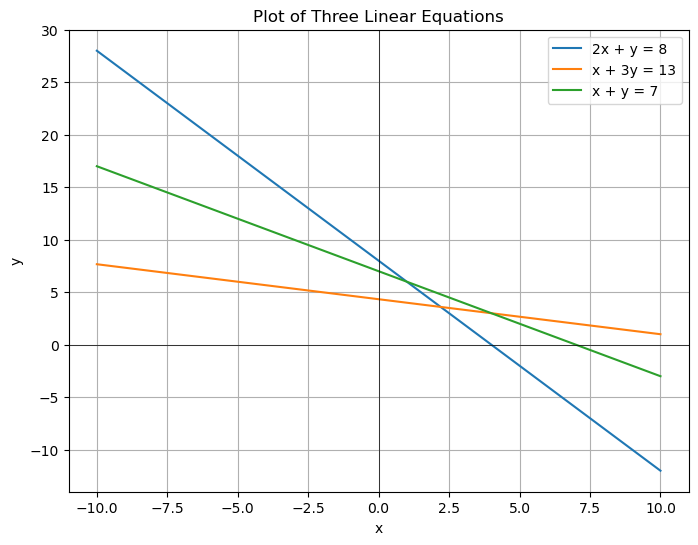

In [ ]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
A = np.array([[2., 1.], [1., 3.], [1., 1.]])
B = np.array([8., 13.,7.])[:, None] # makes the vector a column
print('A =\n', A);print('B =\n', B)
x, residuals, rank, s = lstsq(A, b, rcond=None)
print("Rank(A) =", rank)
print("Singular values of A =", s)
print('Least-squares solution x =', x)
print('Residual ||Ax-b|| =', residuals)
# I don't get it

# Define x range
x = np.linspace(-10, 10, 100)

# Define the equations
y1 = 8 - 2* x       
y2 = (13 - x) / 3
y3 = 7 - x 

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='2x + y = 8')
plt.plot(x, y2, label='x + 3y = 13')
plt.plot(x, y3, label='x + y = 7')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Linear Equations')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show plot
plt.show()

# don't think this is right, pretty sure what we're trying to do is find the closest point where they all intersect

## Exercise Problem 2
Create a $3\times 3$ system with a unique solution. Verify using rank and determinant, then solve with `solve`.

In [53]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
A = np.array([[1., 2., -1.], [3., 1., 2.], [2., -1., 1.]])
B = np.array([4., 5., -1.])
n = matrix_rank(np.c_[A, B])
aug = np.c_[A,B]

rank = matrix_rank(A); determinant = det(A)
if rank == n and abs(determinant) > 0:
    print("Rank is 3 and Determinant is non zero."); print("The system has a unique solution.")
else:
    print("Does not have a unique solution (inconsistent or infinite solutions).")

x = solve(A, b)
print("Using solve:")
print(f"x = {x[0]:.2f}")
print(f"y = {x[1]:.2f}")
print(f"z = {x[2]:.2f}")

Rank is 3 and Determinant is non zero.
The system has a unique solution.
Using solve:
x = 8.50
y = -0.50
z = -7.50


## Exercise Problem 3
Create an inconsistent system. Compute the least-squares solution and residual norm.

In [ ]:
# Your code here

## Exercise Problem 4
Use `gaussian_elimination_solve` to solve a new square system and verify the result with `solve`.

In [ ]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
